In [ ]:
!wget https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/utils_ex6/utils.py -O utils.py
!wget https://raw.githubusercontent.com/ManteLab/Iton_notebooks_public/refs/heads/main/data_ex6/neural_data.mat -O neural_data.mat
!wget https://raw.githubusercontent.com/ManteLab/Iton_notebooks_public/refs/heads/main/data_ex6/dataset1.mat -O dataset1.mat
!wget https://raw.githubusercontent.com/ManteLab/Iton_notebooks_public/refs/heads/main/data_ex6/dataset3.mat -O dataset3.mat
!pip3 install --quiet hdf5storage ipympl

# Part 1

**Motivation**: Perceptual decision-making is a core aspect in everyday cognition. In difficult perceptual situations, for instance when driving a car through heavy rain and trying to read a traffic sign, perceptual decision-making can be error prone. Standard models assume that these errors are either due to:
*   a high *noise level in the sensory input* (raindrops on the windshield), or
*   *internal brain processes* (neuronal noise) or
*   a *mixture of both*.


In the laboratory, perceptual decision-making is usually investigated by linking the perception of incoming sensory information to making a choice among several alternatives. For example, in the widely-used random dot motion task, participants are required to report the net direction of a cloud of moving dots within a certain time frame. (Park et al., 2016)

The perceptual decisions we are going to look at in the following exercises depend on these parameters:

**input, properties of the stimulus**
- coherence, i.e. the percentage of coherently moving dots in the cloud of dots;
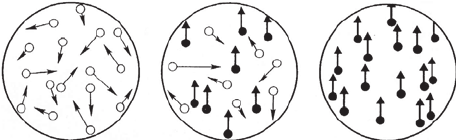

- fast noise, i.e. sensory input from all incoherently moving dots, which are masking the signal and change very rapidly from frame to frame;

**internal brain processes**

- slow noise, which varies from trial to trial or even slower i.e. it is fixed within a trial;
- fast inner noise, which changes a lot within a trial;
- lambda, which represent either leaky evidence accumulation (λ < 0, imagine filling a bucket with a hole in it), perfect accumulation (λ = 0, our bucket is whole, so it holds all the water we pour into it) or instable accumulation (λ > 0, this bucket keeps multiplying the water we've poured into it).
Lambda characterizes memory: do we forget? do we remember perfectly? does the evidence overwhelm us?

Overall, the models we are going to look at are important because they give us an idea about what kind of transformation happens in the brain such that it turns the known input (stimulus) into known output (people's choices).

And if we know what this latent process looks like than we know what the neural computations are likely aiming to implement. We can correlate that latent process with neural activity of a single neuron and at neural populational level, and we'll look at that in Part 2 of this exercise.

However, let us start with the latent process itself, and Part 1 of this exercise is dedicated to getting acquainted with it.

If you run the plot below, you'll see 5 traces of that latent process, depending on the parameter values you pick. Try different values, see how they influence the traces. And once again let's remember why this is exciting: we are now looking at the hidden unobservable process, that is transforming the incoming signal (represented as green 'evidence pulse' in the plot) into a decision to press rightward (if the trace ends above 0; it will be coloured blue so you can check yourself) or leftward (if the trace ends below 0; it will be coloured orange so you can check yourself). Those are not just some abstract lines -- these are links between what people see and what people perceive and consequently act upon.

This is a 'door' into inner workings of the brain without opening the scull, inserting electrodes or putting people into various brain scanners. Just from observing the behavior and relating it to the stimulus.

### Recap of the parameters
(to put them conveniently near the plot)
 - coherence (input, in the stimulus);
 - fast noise (input, in the stimulus);
 - slow noise (in the brain);
 - fast inner noise (in the brain);
 - lambda (in the brain): leakiness (λ < 0), instability (λ > 0) or perfect accumulation (λ = 0).

In the plot below we show 5 traces of the accumulator variable (aka latent process). For movement in the rightward direction we define positive input. Thus, if at the end of the trace the accumulator variable is positive this corresponds to the rightward choice, and negative –- to the leftward choice.
Try different values of the parameters and familiarize yourself with how the latent process responds to them. Can you describe those regularities?

In [ ]:
%matplotlib widget

from utils import plot_sims

plot_sims()

### Model-free Analyses

In a real experiment we do not just collect 5 trials, we collect thousands of them. When exploring such data we usually start with model-free analyses.

A model is a set of assumptions that a system behaves a certain way. For example, in the simulations above we assumed that the perception of dots movement, which participant communicates to us via the final choice (left or right keypress), depends on the noise level in relation to signal strength. Those are the parameters we explored above.

It is important to understand though that every parametrization is a hypothesis: we assume that this is what matters, this is what governs the latent process and consequently the observed behavior.

Hypotheses, however, are not facts, but educated (and sometimes wild) guesses. They might be wrong. As statistics teaches, before applying any method -- test if the assumptions of that method are met.

One way to do that is by performing model-free analyses: finding ways to represent the data without assuming what's going on. We illustrate this approach by two plots here:
- performance, i.e. % of correct choices (y-axis) after seeing moving dots for t seconds (x-axis);
- psychophysical kernels, i.e. how much the same ‘bit’ of evidence at any point in time influenced the final choice.

We know the ground truth, because here we are working not with the data from participants, but with 12 thousand simulations of choices (2000 trials per condition, 6 conditions: 3 coherences (0.2;0.4;0.8) x 2 directions of motion (rightward and leftward)).

This gives us an opportunity to see how each assumption (parameter value) would manifest in those model-free plots. You can now explore it by changing values on the sliders for individual parameters and their various combinations.

Can we distinctively recognize some parameter presence and maybe even say something about their values (e.g. whether lambda is positive, negative or zero) from the shape of these model-free plots? Do any parameters produce similar effect? The latter could indicate that the model including all the proposed parameters might be ill-defined for the dataset of this kind.

Once again, play with parameters and describe the influence of each: can we see their signatures in model-free plots? Are they unique? If we had data with unknown ground-truth (parameter values) could we tell just by looking at model-free plots what are those values most likely?


In [ ]:
%matplotlib widget

from utils import plot_model_free_analysis_conditions
import numpy as np

plot_model_free_analysis_conditions(
    C=np.concatenate(([0], np.ones(10))),
    ks=[0.2, 0.4, 0.8]
)

Finally, to conclude part 1, let us look at two datasets (dashed lines on plots below) via model-free plots.

As in the real experiment, the ground truth, i.e. the true generating model and it's parameters, are unknown to you.

Let us assume in this exercise that we decided to proceed with the model we've been exploring so far. As experimenters we know the input coherencies of the stimuli we've shown to participants (see k values in plot legends). However, we do not know the amount of noise that our random dots masking the signal produced. And, of course, we have no idea what the inner parameters are.

The task here is to find such parameter values that seem like it could be a match to the data.

Do you need one parameter for that or a combination of parameters? Is the solution you found unique or could you find multiple solutions?

Write down the solution(s) you found. We'll discuss them together.

What else can possibly influence our ability to infer those values from data? Tip: look at the errorbars, they show 95% confidence intervals and quantify our uncertainty about any point estimates. The wider they are the less we can trust the position and exact shape of those curves.

The size of the dataset influences the precision of our estimates. In this exercise you have two example datasets with a pair of model-free plots for each. Can you identify from the plots which dataset is 8 times larger than the other one?



In [ ]:
%matplotlib widget

import hdf5storage
from utils import plot_model_free_analysis_conditions_vs_baseline

dataset_1 = hdf5storage.loadmat('dataset1.mat')

plot_model_free_analysis_conditions_vs_baseline(
    baseline_data=dataset_1
)

In [ ]:
%matplotlib widget

import hdf5storage
from utils import plot_model_free_analysis_conditions_vs_baseline

dataset_3 = hdf5storage.loadmat('dataset3.mat')

plot_model_free_analysis_conditions_vs_baseline(
    baseline_data=dataset_3
)

# Part 2

Now let's look at the neural data recorded in monkeys performing random dots task.

In part 1 we mentioned that behavioral models describe latent processes which we can later relate to the neural activity.

It is important that you do not mix those: behavioral models are only based on data (stimuli and choices) and are our best guess at what happens inbetween, they give us hypotheses about 'what does brain do'; neural data in this part is more about 'how does brain do that'.

That accumulator variable a(t) above is never actually observed by experimenters, it is just their best explanation of how the brain could solve the problem. With actual neural recordings we might finally get access to it.

And, of course, our assumptions from behavioral models (part 1) have to make sense given what we observe in neural data. If we say in part 1 that information is accumulated somehow (be it like water in the proverbial bucket or something else) than we expect that neurons are implementing this accumulation somehow.

Questions then are: do they? Can we see any support for this idea? How would we see it by the way?

Remember the qualitative similarity which we aimed for when inferring parameters that could've generated the datasets in part 1?

Let us now look for that qualitative similarity between the accumulator variable a(t), i.e. latent process in the very first plot of part 1, and the neural data: can you find neurons with firing rates (y-axis) resembling accumulation?

All the plots start with the onset of the stimulus (0 at x-axis) and show averages across all trials for individual neurons.

In [ ]:
import hdf5storage

neural_data = hdf5storage.loadmat('neural_data.mat')

In [ ]:
%matplotlib widget

from utils import plot_single_neuron

plot_single_neuron(neural_data)

We can also explore if the neuron responds differently to one experimental condition compared to the other. Let us once again look at trial averages for individual neurons.

Can you find neurons that prefer (have a higher response rate to) right choice? What about left choice? Do all neurons have such a preference? It is called selectivity.

Is there any difference in neural selectivity for correct and incorrect trials?

In [ ]:
%matplotlib widget

from utils import plot_neuron_by_choice

plot_neuron_by_choice(neural_data)

As you remember from part 1, right or left choice are only two of experimental conditions in random dots. Coherency is another condition, determining the strength of the signal controlled by the experimenter.

In the plots below you can investigate how neurons respond to three different coherency levels, where 0% coherency means that there is no signal at all in the stimulus, just noise.

Would you say that any neurons are selective for coherency? Is there a difference between correct and incorrect trials?

In [ ]:
%matplotlib widget

from utils import plot_neuron_by_coherence

plot_neuron_by_coherence(neural_data)

We looked at trial averages for individual neurons so far. We can also look at the neural population averages.

To do that let's first introduce a measure Δ that quantifies the strength of the preference each neuron has for rightward choice compared to leftward choice.

Negative values of Δ show that leftward choice is preferred over rightward.

In [ ]:
%matplotlib widget

from utils import calculate_deltas, plot_deltas

deltas = calculate_deltas(neural_data)
plot_deltas(deltas)

Now you can use the Δ plots above to select the threshold delta level. Only neurons, which have the absolute Δ value above the threshold would form the population and their activity will be averaged in the population average plot below.

What is the influence of increasing the Δ threshold?

Do you think that neural population codes (i.e. is selective) for the choice?

Does this population average signal seem to you more or less noisy than individual trial averages?

In [ ]:
%matplotlib widget

from utils import plot_aggregated_neurons

plot_aggregated_neurons(neural_data)

Finally, to make a connection between intuitions gained in both parts of this exercise, let us circle back to part 1 and generate simulated behavioral data of the same dimensions as neural data.

Just for comparison: what would we get if we averaged over accumulator variable across all trials? (You can try to answer this question before running the plot. Start with: do you expect it to come out noisier than individual a(t) latent process or quite the opposite?)

Does it resemble neural population average in any way?

What is different?

What do you think it means? Does our model from part 1 seem to capture everything with its assumptions or do we see evidence that this is not the whole story?

Can you find parameters that increase qualitative similarity between the two?

Is the solution unique?

In [ ]:
%matplotlib widget

from utils import plot_sims_conditions

plot_sims_conditions(neural_data)